## 1.0 Introdução

Este notebook destina-se a um projeto End-to-End de Machine Learning aplicando Regressão Linear. O dataset utilizado será "WeatherHistory" que é um dataset com informações de temperatura, pressão, velocidade de vento, Umidade etc... em Szeged-Hungria de 2006 a 2016. **O objetivo será prever a temperatura aparente dado os demais dados medidos**.
    
Para iniciar, vamos importar os dataset e dá uma olhada nos primeiros valores do dataframe:

In [1]:
%matplotlib inline

import pandas as pd

dataOrigin = pd.read_csv("weatherHistory.csv")
dataOrigin.head()

,Formatted_Date,Summary,Precip_Type,Temperature(celsius),Apparent_Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


nota-se que temos 4 atributos categóricos: **Formatted_Date**, **Summary**, **Precip_Type** e **Daily_Summary**. Os demais atributos são númericos e informam dados relacionados à temperatura, humidade etc... Abaixo tem-se uma listagem dos atributos e um pequeno resumo sobre cada um:
   
   * **Formatted_Date**: Data de quando ocorrou a medição
   * **Summary**: Descrição por extenso do clima durante a medida
   * **Precip_Type**: Qual o tipo de precipitação no momento das medições
   * **Temperature**: Temperatura medida em Celsius
   * **ApparentTemperature**: Temperatura aparente em Celsius
   * **Humidity**: Umidade relativa 
   * **WindSpeed**: Velocidade do vento em km/h
   * **WindBearing**: Ângulo do vento com relação ao Norte geográfico em graus
   * **Visibility**: Distância máxima possível onde é ainda possível distiguir um  objeto a partir do local de medição
   * **LoudCover**: Medição feita em lugar alto ou não
   * **Pressure**: Pressão atmosférica em milibars
   
Agora, vamos dar um olhada em algumas informações do dataset além de procurar por um dado categórico que seja útil mais a frente

In [2]:
dataOrigin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted_Date                   96453 non-null object
Summary                          96453 non-null object
Precip_Type                      95936 non-null object
Temperature(celsius)             96453 non-null float64
Apparent_Temperature(celsius)    96453 non-null float64
Humidity                         96453 non-null float64
Wind_Speed(km/h)                 96453 non-null float64
Wind_Bearing(degrees)            96453 non-null int64
Visibility(km)                   96453 non-null float64
Loud_Cover                       96453 non-null int64
Pressure_(millibars)             96453 non-null float64
Daily_Summary                    96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


primeiramente nota-se que a única coluna onde falta dados é a coluna **Precip_Type**. Vamos checar essa coluna e ver quais valores há em suas entradas

In [3]:
dataOrigin.Precip_Type.value_counts()

rain    85224
snow    10712
Name: Precip_Type, dtype: int64

ver-se que são apenas dois valores distintos. Agora checamos as colunas **Summary** e **Daily_Summary** em busca de alguns *insights* com relação a qual dado categórico usar

In [4]:
dataOrigin.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [5]:
dataOrigin.Daily_Summary.value_counts()

Mostly cloudy throughout the day.                                                                                           20085
Partly cloudy throughout the day.                                                                                            9981
Partly cloudy until night.                                                                                                   6169
Partly cloudy starting in the morning.                                                                                       5184
Foggy in the morning.                                                                                                        4201
Foggy starting overnight continuing until morning.                                                                           3576
Partly cloudy until evening.                                                                                                 3288
Mostly cloudy until night.                                                                

já de primeira nota-se que para a coluna **Summary** teremos um problema com a codificação dos dados categóricos mais a frente, pois há valores que apresentam somente uma ocorrência, logo quando separarmos os dados entre dados de treino e dados de teste, este valor ficará apenas em um desses dados o que ocasionará um erro por valor categórico desconhecido.

Assim, opta-se por usar os valores da coluna **Daily_Summary** como a coluna de dados categóricos para se usar no projeto
*****
Análisado os valores categóricos, vamos checar agora os valores númericos. Para isso, vamos fazer um histograma para cada coluna númerica

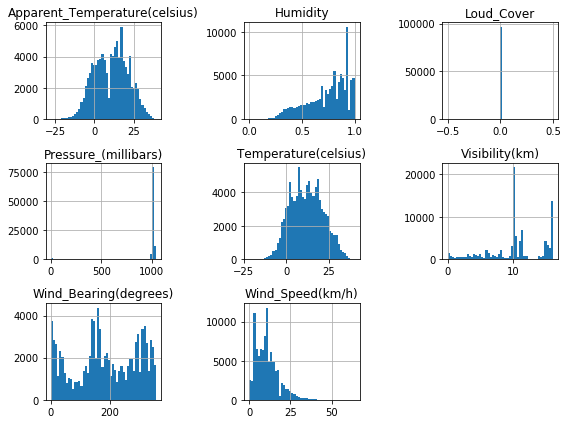

In [6]:
import matplotlib.pyplot as plt
dataOrigin.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

a coluna **Loud Cover** também não aparenta ter muita influência, visto que só é composta dos valores 0 ou 1. Então, podemos retirar as colunas **Formatted_Date**, **Summary**, **Loud Cover** e **Precip_Type** e trabalhar apenas com as colunas restantes sem perda de informações relevantes para aplicar no algoritmo de regressão linear. 

Assim, criamos um novo dataframe para o dataset sem as colunas listadas anteriormente

In [7]:
data = dataOrigin.drop(["Formatted_Date","Precip_Type","Loud_Cover", "Summary"], axis=1)
data.head()

,Temperature(celsius),Apparent_Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure_(millibars),Daily_Summary
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


Partindo-se agora para a limpeza e formatação dos dados, vamos primeiramente separar o dataset em conjunto de treino e conjunto de teste. Vamos usar a proporção "padrão" de **80%** para treino e **20%** para teste. 

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print("Os dados contêm {} instâncias\n {} instâncias de treinamento \n {} instâncias de teste".
      format(len(data),len(train_set),len(test_set)))

Os dados contêm 96453 instâncias
 77162 instâncias de treinamento 
 19291 instâncias de teste


***
Criamos uma cópia do conjunto de treino para podermos manipulá-lo sem modificar o conjunto original por enquanto


In [10]:
train = train_set.copy()

***
Vamos verificar gráficamente se há alguma relação mais direta entre alguns atributos e o atributo *target* da temperatura aparente

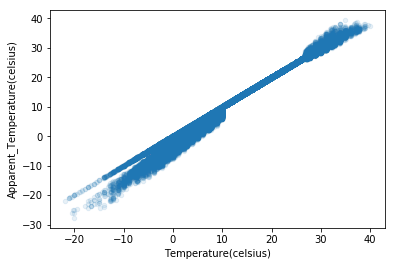

In [11]:
train.plot(kind="scatter", x="Temperature(celsius)", y="Apparent_Temperature(celsius)", alpha=0.1)

Bom! a temperatura e a temperatura aparente apresentam quase um relação linear 1 para 1 como já era esperado, afinal a temperatura aparente é uma oscilação por diversos fatores em cima do valor real da temperatura. 

Vamos ver mais algumas outras relações

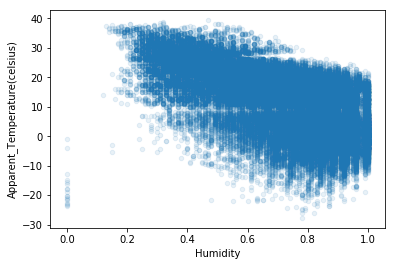

In [12]:
train.plot(kind="scatter", x="Humidity", y="Apparent_Temperature(celsius)", alpha=0.1)

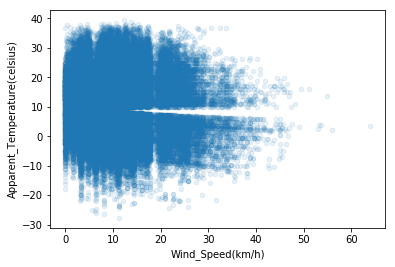

In [13]:
train.plot(kind="scatter", x="Wind_Speed(km/h)", y="Apparent_Temperature(celsius)", alpha=0.1)

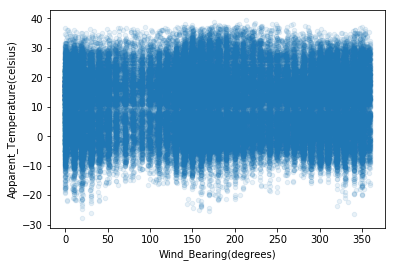

In [14]:
train.plot(kind="scatter", x="Wind_Bearing(degrees)", y="Apparent_Temperature(celsius)", alpha=0.1)

as outras relações não demonstram graficamente uma relação direta. Vamos voltar a ver a relação temperatura x temperatura aparente, mas agora levando em conta a humidade e a velocidade do vento no mesmo plot 

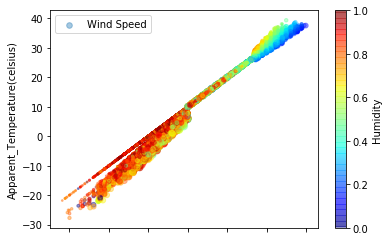

In [16]:
train.plot(kind="scatter", x="Temperature(celsius)", y="Apparent_Temperature(celsius)", alpha=0.4,
           s=train["Wind_Speed(km/h)"], label="Wind Speed",
           c="Humidity", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

deste plot pode-se ver que a velocidade do vento não apresenta tanta variação com relação ao aumento da temperatura e que a **umidade aparenta uma relação inversa com a temperatura aparente**, pois ela é baixa para valores altos de temperatura, em sua maioria, e alta para valores baixo de temperatura. 

Vamos ver a correlação da temperatura ambiente com os demais atributos e ver se existe mais alguma conclusão que pode ser tirada

In [17]:
corr_matrix = train.corr()
corr_matrix["Apparent_Temperature(celsius)"].sort_values(ascending=False)

Apparent_Temperature(celsius)    1.000000
Temperature(celsius)             0.992605
Visibility(km)                   0.380978
Wind_Bearing(degrees)            0.026186
Pressure_(millibars)             0.000173
Wind_Speed(km/h)                -0.057463
Humidity                        -0.603477
Name: Apparent_Temperature(celsius), dtype: float64

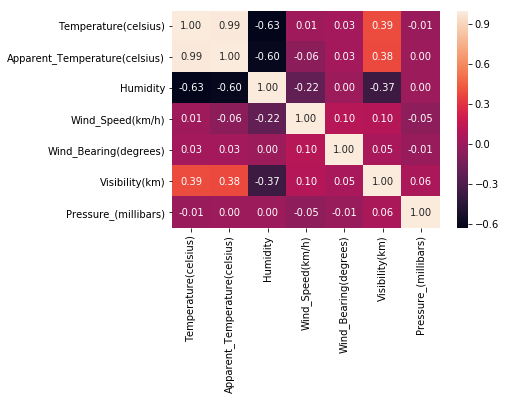

In [18]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")

como já era esperado a temperatura tem uma alta correlação com a temperatura aparente, enquanto que a humidade mostra uma correlação inversa alta. Já os demais atributos apresentam uma correlação mais baixa, com a pressão sendo quase que totalmente descorrelacionada com temperatura ambiente. 

Com as conclusões dessa análise vamos adicionar mais 3 atributos e ver como a correlação muda, sendo eles:

  * **wind_chill_index**: um índice oficial que depende da temperatura e da velocidade do vento que pode ser visto em: [Wind Chill Index](https://en.wikipedia.org/wiki/Wind_chill)
  * **relative_temperatura**: produto da umidade pela temperatura
  * **invese_humidity**: inverso da umidade relativa
  
**OBS**: antes de calcular a inversa da umidade, vamos retirar as linhas do conjunto de dados em que o valor da umidade é 0.0, pois assim evitamos uma divisão por zero.

In [19]:
#remove lines with 0.0 humidity to calculte inverse
train = train.loc[train["Humidity"] != 0.0, :]

train["wind_chill_index"] = 13.12 + 0.6215*train["Temperature(celsius)"] - 11.37*(train["Wind_Speed(km/h)"]**0.16) + 0.3965*train["Temperature(celsius)"]*(train["Wind_Speed(km/h)"]**0.16)
train["relative_temperature"] = train["Humidity"]*train["Temperature(celsius)"]
train["inverse_humidity"] = 1/(train["Humidity"])

In [20]:
train_correlation_matrix = train.corr()
train_correlation_matrix["Apparent_Temperature(celsius)"].sort_values(ascending=False)

Apparent_Temperature(celsius)    1.000000
Temperature(celsius)             0.992607
wind_chill_index                 0.991578
relative_temperature             0.858239
inverse_humidity                 0.574962
Visibility(km)                   0.380824
Wind_Bearing(degrees)            0.025685
Pressure_(millibars)             0.000314
Wind_Speed(km/h)                -0.057535
Humidity                        -0.607338
Name: Apparent_Temperature(celsius), dtype: float64

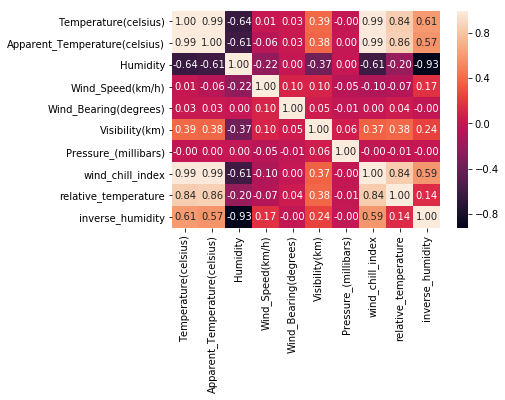

In [21]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")

Ótimos resultados. Todas os novos atributos apresentam uma boa correlação com a temperatura aparente, sendo o **wind_chill_index** quase tão correlacionado quanto a temperatura, já que é baseado na própria temperatura (que possui alta correlação com a temperatura ambiente). 
 ************
 
Vamos agora separar o conjunto de treino nos parâmetros **x** e no *target* **y**, e depois vamos checar se há valores faltando 

In [22]:
#remove lines with 0.0 humidity to calculte inverse
train_set = train_set.loc[train_set["Humidity"] != 0.0, :]

# drop creates a copy of the remain data and does not affect train_set
train_X = train_set.drop("Apparent_Temperature(celsius)", axis=1)

# copy the label (y) from train_set
train_y = train_set["Apparent_Temperature(celsius)"].copy()

In [23]:
train_X.isnull().sum()

Temperature(celsius)     0
Humidity                 0
Wind_Speed(km/h)         0
Wind_Bearing(degrees)    0
Visibility(km)           0
Pressure_(millibars)     0
Daily_Summary            0
dtype: int64

****
Não há valores faltando, logo não é necessário usar alguma técnica para substituição de valores. Então, vamos dar uma checada agora em como vai ficar os valores categóricos da coluna **Daily_Summary** codificados usando *One-Hot Enconding*

In [24]:
from sklearn.preprocessing import OneHotEncoder 

train_X_cat_encoded, train_X_categories = train_X.Daily_Summary.factorize()
encoder = OneHotEncoder(sparse=False)

train_X_cat_1hot = encoder.fit_transform(train_X_cat_encoded.reshape(-1,1))

train_X_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***
sendo as categorias e quantidades apresentados a seguir:

In [26]:
train_X_categories

Index(['Mostly cloudy throughout the day.',
       'Breezy until evening and foggy in the morning.',
       'Partly cloudy starting in the morning continuing until night.',
       'Mostly cloudy starting overnight.', 'Foggy in the morning.',
       'Mostly cloudy until night.', 'Partly cloudy throughout the day.',
       'Partly cloudy until morning.',
       'Mostly cloudy starting in the morning continuing until night.',
       'Foggy starting overnight continuing until morning.',
       ...
       'Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.',
       'Breezy and mostly cloudy overnight.',
       'Mostly cloudy until night and windy starting in the morning continuing until afternoon.',
       'Light rain starting overnight.',
       'Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.',
       'Partly cloudy throughout the day and breezy starting in the 

In [27]:
train_X_cat_1hot.shape

(77144, 214)

embora os valores codificados apresentem um tamanho considerável de colunas, o que pode influência no tempo de *fitting* do algoritmo, vamos continuar usando esses valores, pois o projeto é mais focado nos passos e corretude da regressão do que na performance.
********
Dando continuidade, vamos definir duas clases para lidar com a extração das colunas do dataframe e para adicionar as novas colunas no conjunto de dados original. São as classes **CombinedAttributeAdder** e **DataFramSelector**

In [28]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# indices for the columns
temp_ix, hum_ix, wind_speed_ix = 0, 1, 2

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        
        return self # nothing else to do
  
    def transform(self, X, y=None):
    
        wind_chill_index = 13.12 + 0.6215*X[:, temp_ix] - 11.37*(X[:,wind_speed_ix]**0.16) + 0.3965*X[:,temp_ix]*(X[:,wind_speed_ix]**0.16)
        relative_temperature = X[:,hum_ix]*X[:,temp_ix]
        inverse_humidity = 1.0/X[:,hum_ix]
        return np.c_[X, wind_chill_index, relative_temperature, inverse_humidity]

    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values



***
checando se a classe **CombinedAttributeAdder** está funcionando corretamente:

In [30]:
attr_adder = CombinedAttributesAdder()
train_X_extra_attribs = attr_adder.transform(train_X.values)

# train_X_extra_attribs is a numpy array
# transforming it to a dataframe for better visualization
train_X_extra_attribs_df = pd.DataFrame(
    train_X_extra_attribs,
    columns=list(train_X.columns)+["wind_chill_index", 
                                   "relative_temperature",
                                   "inverse_humidity"]
                          )

train_X_extra_attribs_df.head()

,Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure_(millibars),Daily_Summary,wind_chill_index,relative_temperature,inverse_humidity
0,15.4389,0.96,10.8675,0,5.1359,1014.97,Mostly cloudy throughout the day.,15.0273,14.8213,1.04167
1,6.02778,0.67,33.5041,302,11.3988,1010.07,Breezy until evening and foggy in the morning.,1.11587,4.03861,1.49254
2,18.2389,0.97,5.7316,262,14.6832,1010.24,Mostly cloudy throughout the day.,18.9835,17.6917,1.03093
3,10.2278,0.66,3.22,310,9.982,1018.47,Partly cloudy starting in the morning continui...,10.6569,6.75033,1.51515
4,7.95,0.76,14.007,300,9.982,1016.88,Mostly cloudy starting overnight.,5.52455,6.042,1.31579


****
a classe está funcionando corretamente. Agora vamos criar um *pipeline* para todas as operações necessárias para se chegar ao conjunto pronto para ser aplicado na regressão linear. As operações serão: **codificação para valores categóricos**, ***feature scaling*** e **adição de novas colunas**. 

In [31]:
#Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from future_encoders import OneHotEncoder

# numerical columns 
num_attribs = list(train_X.drop("Daily_Summary", axis=1).columns)

# categorical columns
cat_attribs = ["Daily_Summary"]

# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

***
Com o pipeline de transformações sobre o conjunto feito, basta agora passar o conjunto de treino nele para termos na saída o cojunto de treino preparado com ***feature scaling***, ***One-Hot enconding*** e **adição de novos atributos**.

In [32]:
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[ 3.65971683e-01,  1.15400808e+00,  7.31262860e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.21305998e-01, -3.32666640e-01,  3.27567788e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.59707192e-01,  1.20527272e+00, -7.34229700e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.72786486e-01,  3.85038395e-01,  9.63721270e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.56453411e-01,  4.36303040e-01, -1.45020160e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.29125580e-01,  8.46420203e-01,  3.38876294e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

***
Com o conjunto de treino pronto, basta agora aplicar no modelo de regressão linear

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

***
Vamos ver as predições dos 5 primeiros números para a temperatura aparente dado pelo estimador e comparar com os valores reais medidos

In [34]:
some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# make predictons
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [15.00741093  1.02677828 18.77156492 10.03938942  6.29144642]


In [35]:
print("Labels:", list(some_labels))

Labels: [15.438888888900001, 1.1333333333, 18.2388888889, 10.2277777778, 5.5388888889]


***
vendo apenas pela diferença de valores, tudo indica que o o algoritmo se saiu muito bem com as predições dos 5 primeiros valores. Vamos ver para todo o conjunto de predição e usar o **RMSE** para ter uma métrica melhor de analisar o quão bem foi o algoritmo

In [36]:
from sklearn.metrics import mean_squared_error

apparent_temperature = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, apparent_temperature)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8989632204265431

***
Muito Bom! O algortimo se saiu muito bem para os valores utilizados no conjunto de treino. Mas será que esse valor do **RMSE** varia muito com a variação do conjunto de treino? Vamos checar isso via **Cross Validation**. Primeiro criamos uma função para mostrar os *scores*, e depois aplicamos o **Cross Validation**

In [37]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [38]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, 
                             train_X_prepared, 
                             train_y,
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.89996575 0.89772757 0.90161684 0.91006508 0.90803559 0.90374011
 0.89188781 0.89542373 0.90721713 0.90572088]
Mean: 0.9021400489598745
Standard deviation: 0.005598314798880632


pelo **Cross validation** vemos que o valor do **RMSE** tende a variar muito pouco em torno da média, que já é baixa, pois apresenta um desvio padrão muito próximo a zero. 
******

Por fim, visto que o estimador aparenta já está bem afinado, vamos agora aplicá-lo no conjunto de teste e ver como ele se sai. Primeiramente vamos treinar o estimador mais uma vez e depois aplicar o conjunto de teste:

In [40]:
lin_reg = LinearRegression()

lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#remove lines with 0.0 humidity to calculte inverse
test_set = test_set.loc[test_set["Humidity"] != 0.0, :]

test_X = test_set.drop("Apparent_Temperature(celsius)", axis=1)
test_y = test_set["Apparent_Temperature(celsius)"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


final_predictions = lin_reg.predict(test_X_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.899307366386049


****
Muito bom!!! Vemos que o estimador também se saiu muito bem com o conjunto de teste, assim como foi no conjunto de treino. Com isso o projeto é finalizado. Para fechar vamos só fazer mais uma ação, apenas para termos algo gŕafico. Vamos plotar novamente o gráfico Temperatura x Temperatura Aparente levando em conta agora as predições e os valores reais no mesmo plot

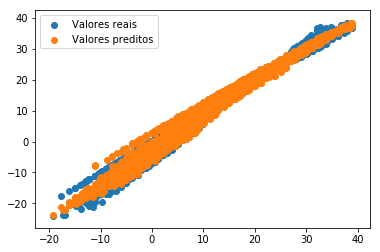

In [42]:
import matplotlib.pyplot as plt

plt.scatter(test_X["Temperature(celsius)"].values, test_y, label="Valores reais")
plt.scatter(test_X["Temperature(celsius)"].values, final_predictions, label="Valores preditos")
plt.legend()